In [1]:
!pip install mplsoccer
!pip install imblearn
!pip install TPOT
!pip install highlight_text
!pip install delayed

     |████████████████████████████████| 57 kB 802 kB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=8c1e767a506d11a58e62e41fa3a5c748a5ec1336f742cba8b6e9f3bf4c9075cb
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer
     |████████████████████████████████| 23.2 MB 928 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 1.0.1 which is incompatible.
     |████████████████████████

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 20 19:03:29 2021

@author: Nirmit
"""
############################################################################################################################################
'''Function to plot shot maps of given players  for given seasons'''
############################################################################################################################################

def shot_maps(player,season=0):
    df = df_loaded[(df_loaded['player'].isin(player)) & (df_loaded['season'].isin(season))].reset_index().drop('index', axis =1)

    df_list = []
    for i in range(len(player)):
        df_list.append(df[df['player'] == player[i]].reset_index().drop('index', axis =1)) 
    
    import mplsoccer
    import matplotlib.pyplot as plt
    from highlight_text import fig_text
    for df in df_list:
        df['X'] = pd.to_numeric(df['X'])
        df['Y'] = pd.to_numeric(df['Y'])
        df['xG'] = pd.to_numeric(df['xG'])
        df['minute'] = pd.to_numeric(df['minute'])
      
      
        df['X'] = df['X']*100
        df['Y'] = df['Y']*100
        df['xx'] = df['Y']
        df['yy'] = df['X']
        
        df['X'] = df['xx']
        df['Y'] = df['yy']
        df['X'] = 100-df['X']        
        
        def plotShotMap():
                    for x in range(len(df['X'])):
                        if df['result'][x] == 'Goal': 
                                plt.scatter(df['X'][x],df['Y'][x], color = '#74c69d',s=df['xG'][x]*500,edgecolor='white',linewidth=2,alpha=.9)            
                        elif df['result'][x] == 'MissedShots': 
                                plt.scatter(df['X'][x],df['Y'][x], color = '#E64C4C',s=df['xG'][x]*500,edgecolor='white',linewidth=2,alpha=.9)       
                        elif df['result'][x] == 'BlockedShot': 
                                plt.scatter(df['X'][x],df['Y'][x], color = '#FFF712',s=df['xG'][x]*500,edgecolor='white',linewidth=2,alpha=.9)       
                        elif df['result'][x] == 'SavedShot': 
                                plt.scatter(df['X'][x],df['Y'][x], color = '#111ED9',s=df['xG'][x]*500,edgecolor='white',linewidth=2,alpha=.9) 
                        elif df['result'][x] == 'Shot On Post': 
                                plt.scatter(df['X'][x],df['Y'][x], color = '#111ED9',s=df['xG'][x]*500,edgecolor='white',linewidth=2,alpha=.9) 
                        else:
                                plt.scatter(df['X'][x],df['Y'][x], color = '#F0F0F0',s=df['xG'][x]*500,edgecolor='white',linewidth=2,alpha=.9)
                
        fig, ax = plt.subplots(figsize=(13,8.5))
        fig.set_facecolor('#22312b')
        ax.patch.set_facecolor('#22312b')
                
        pitch = mplsoccer.VerticalPitch(pitch_type="wyscout", half=True,pitch_color='#aabb97',stripe_color='#c2d59d', stripe=True, line_color='#c7d5cc', figsize=(13, 8),
                              constrained_layout=False, tight_layout=True)
        pitch.draw(ax=ax)
                
                # plt.ylim(0,60)
                
        plotShotMap()
        if len(season) > 1:
            s=f'{df.player[0]} Shot Map for {season[0]}/{season[0]+1} to {season[-1]}/{season[-1]+1} season'
            x=0.1;y=0.95
        else:
            s=f'{df.player[0]} Shot Map for {df.season[0]}/{df.season[0]+1} season'
            x=.23;y=.95
        fig_text(s=s,
                x=x,y=y,
                fontfamily='Andale Mono',
                fontsize=24,
                color='#ddced4'
        
        )
        
        total_shots = len(df)
        from matplotlib.lines import Line2D
        patches = []
        colors = ['#74c69d','#E64C4C','#FFF712','#111ED9','#F0F0F0','#000000'] 
        labels = ['Goals', 'Missed Shots', 'Blocked Shots', 'Saved Shots', 'Shots on Post','Own Goals']
        patches = [plt.plot([],[], marker="o",color=colors[i], label=labels[i],ms=10, ls="", mec=None,)[0] for i in range(len(df['result'].unique()))]
        
        plt.legend(handles=patches,loc = 'upper right',facecolor = 'black',labelcolor = text_color)
        # plt.legend()
        
        
        fig_text(s=f'Total Shots: {total_shots}',
                x=.27, y =.2, fontsize=14,fontfamily='Andale Mono',color='#554468')
        fig.text(.25,0.05,f'@NTripathii / twitter',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color=text_color)
        
        fig.text(.585,0.05,'*Circle radius proportional to xG',fontstyle='italic',fontsize=11,fontfamily='Andale Mono',color=text_color)


def plotROCAUC(ytest, predProbs):
    
    
    fpr_roc, tpr_roc, _ = roc_curve(yTest, predProbs)
    plt.plot(fpr_roc, tpr_roc, color="navy")
    plt.plot([0, 1], [0, 1], color="orange")
    
    
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC-AUC Curve', fontsize=16)

    
def ErrorCheck(yTest,predictions):

    yActual = yTest
    print("Accuracy: ", round(accuracy_score(yActual, predictions), 4)*100, "%")
    print("Brier RMSE: ", round(mean_squared_error(yActual, predictions), 2))
    print("Log Loss: ", round(log_loss(yActual, predictions), 2))
    cf_mat = confusion_matrix(yActual, predictions)
    print(cf_mat)
    
    report = classification_report(yActual, predictions, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report.index = ['No Goal', 'Goal','accuracy', 'macro avg', 'weighted avg']
    
    plt.figure()
    plotROCAUC(yTest, predProbs)   
    
    return df_report,cf_mat


In [3]:
############################################################################################################################################
'''Loading the CSV file of shots'''
############################################################################################################################################
import time
import json
import player_dictionary_threading_1 as pdt1
import pandas as pd 
import matplotlib.pyplot as plt
import mplsoccer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, log_loss,roc_curve
import numpy as np

# df = pdt1.main()

# i=0
# for dataf in df:
#     i = i+1
#     if len(dataf) == 0:
#         del(df[i])

# df = pd.concat(df)
# df.to_csv('Understat Shots data complete.csv',index = False)
text_color = '#ddced4'
df_loaded = pd.read_csv('../input/d/nktthegreat/understat-expected-goals/Understat Shots data complete.csv')

############################################################################################################################################
'''Webscraping unknown/new data and accessing it'''
############################################################################################################################################

# df = pdt1.main()

# i=0
# for dataf in df:
#     i = i+1
#     if len(dataf) == 0:
#         del(df[i])
# df = pd.concat(df)
# df_new = df[df['season']=='2021']
# df_new.to_csv('Understat Shots data 2021_22.csv',index = False)

df_new = pd.read_csv('../input/d/nktthegreat/understat-expected-goals/Understat Shots data 2021_22.csv') #Absolutely new data that is to be tested

In [4]:
############################################################################################################################################
'''Feature Engineering '''
############################################################################################################################################

'''Creating a separate feature for Weak Foot, Strong Foot and Headers/Other Body Parts label encoded as:
    
    0: Weak Foot
    1: Headers/Other Body Parts
    2: Strong Foot
'''
def FeatureEngineering(dataf):
    df_loaded = dataf
    abc = df_loaded[df_loaded['shotType'].isin(['RightFoot','LeftFoot'])]
    gp = abc.groupby(by = 'player')
    pair = [0]*len(gp.groups.keys())
    for count,player in enumerate(gp.groups.keys()):
       pair[count] = (player,gp.get_group(player)['shotType'].value_counts().index[0])
       
    sf = pd.DataFrame(pair, columns = ['player','StrongFoot'])
    abc = pd.merge(left=abc, right=sf, left_on='player', right_on='player')
    
    abc['StrongFoot'] = np.where((abc['StrongFoot'] == abc['shotType']), 2,0)
    
    c_name = df_loaded.columns
    c_size = len(df_loaded.columns)
    df_loaded = pd.merge(left=df_loaded, right=abc, on ='id', how = 'left')
    df_loaded = df_loaded.drop(df_loaded.columns[c_size:-1],axis = 1)
    c_name = c_name.tolist()
    c_name.append(df_loaded.columns[-1])
    df_loaded.columns = c_name
    
    df_loaded['StrongFoot'] = df_loaded['StrongFoot'].fillna(1)
    
    '''Converting X, Y co-ordinates from (0,1) to (0,100) for wyscout pitch co-ordinates'''
    
    df_loaded[['X','Y']].describe()
    
    df_loaded[['X','Y']] = df_loaded[['X','Y']].multiply(100)
    return df_loaded

df_loaded = FeatureEngineering(df_loaded)
df_new =  FeatureEngineering(df_new)

In [5]:
############################################################################################################################################
''' xG MODEL BASED ON DISTANCE+ANGLE '''
############################################################################################################################################
def SDSA(dataf):
    df_loaded = dataf
    df_loaded['outcome'] = np.where(df_loaded['result'] == 'Goal', 1,0)    
    
    ############################################################################################################################################
    '''Calculating distances of each shot '''
    ############################################################################################################################################
    
    x1 = df_loaded["X"]
    x2 = pd.Series([100]*len(df_loaded))
    y1 = df_loaded["Y"]
    y2 = pd.Series([50]*len(df_loaded))
    
    df_loaded['shotDist'] = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    
    ############################################################################################################################################
    '''Calculating angles of each shot '''
    ############################################################################################################################################
    
    x2 = pd.Series([100]*len(df_loaded))
    y2 = pd.Series([46]*len(df_loaded))
    x3 = pd.Series([100]*len(df_loaded))
    y3 = pd.Series([54]*len(df_loaded))
    
    def calcDistance(a1, b1, a2, b2):
        return np.sqrt((a2 - a1) ** 2 + (b2 - b1) ** 2)
    
    a = calcDistance(x1, y1, x2, y2)
    b = calcDistance(x1, y1, x3, y3)
    c = calcDistance(x2, y2, x3, y3)
    
    np.arccos((a ** 2 + b ** 2 - c ** 2) / (2 * a * b))
    
    df_loaded["shotAngle"] = (np.arccos((a ** 2 + b ** 2 - c ** 2) / (2 * a * b)) * 180) / np.pi

    return df_loaded

df_loaded = SDSA(df_loaded)
df_new = SDSA(df_new)

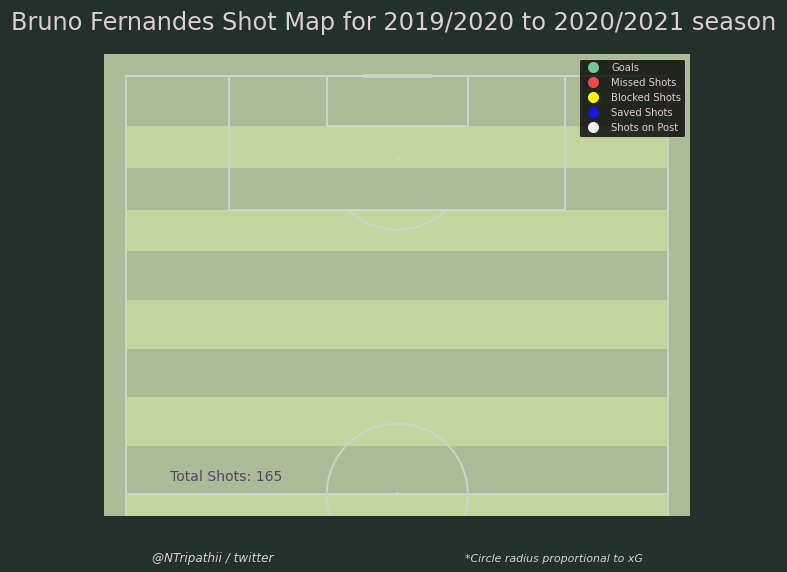

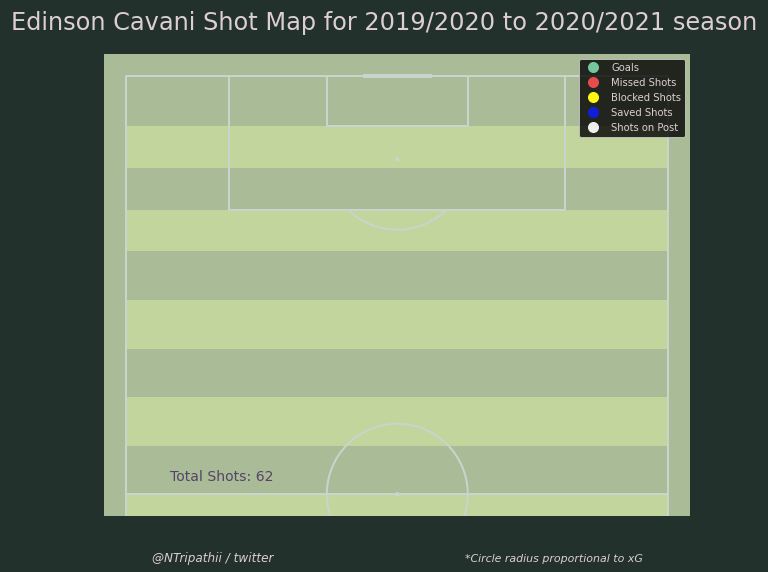

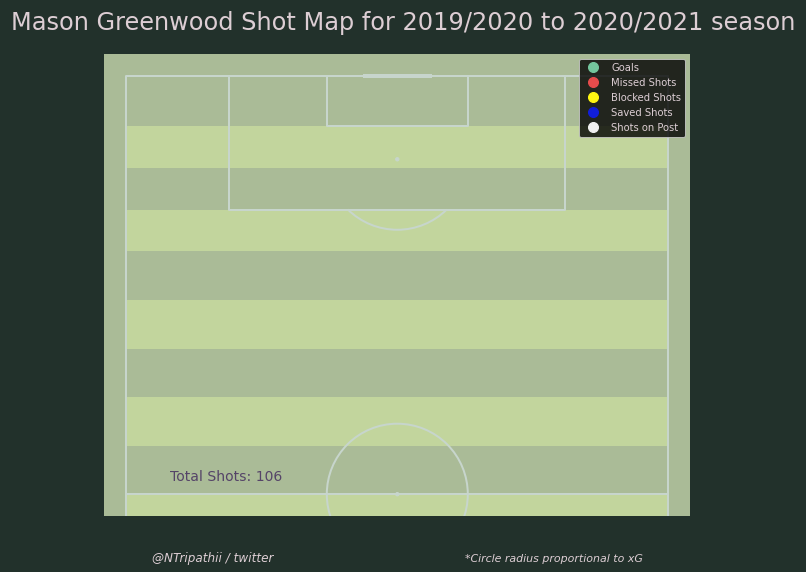

In [6]:
############################################################################################################################################
'''Shot Maps'''
############################################################################################################################################


player = ['Bruno Fernandes','Edinson Cavani', 'Mason Greenwood']
season = [2019,2020]


shot_maps(player,season) #Shot maps of players in 'player' list for seasons in 'seasons' list


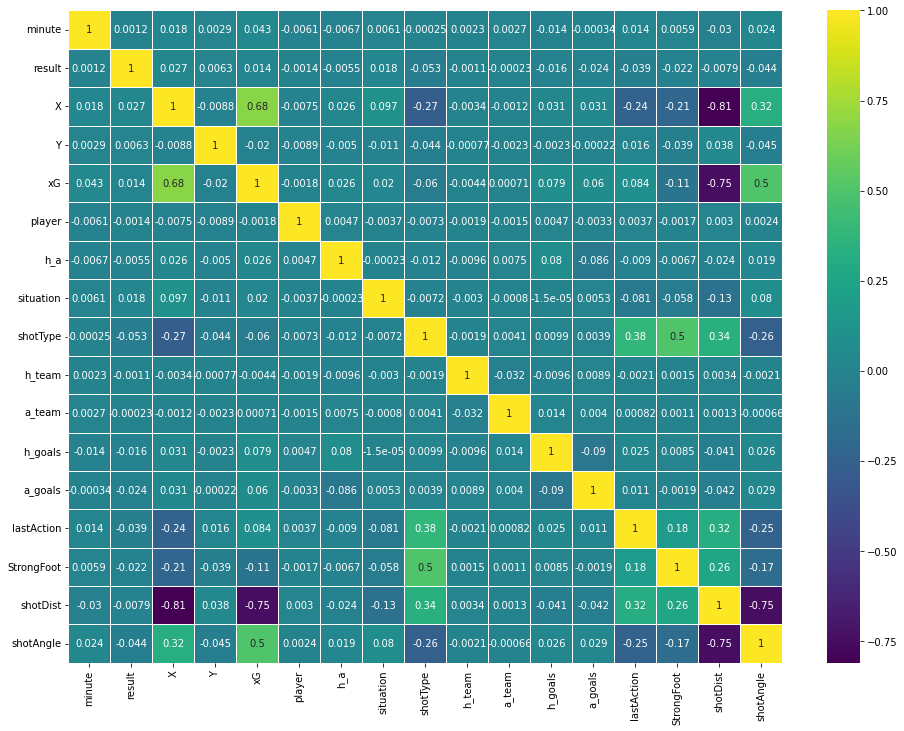

In [7]:

############################################################################################################################################
''' xG MODEL BASED ON DISTANCE+ANGLE '''
############################################################################################################################################
def SDSA(dataf):
    df_loaded = dataf
    df_loaded['outcome'] = np.where(df_loaded['result'] == 'Goal', 1,0)    
    
    ############################################################################################################################################
    '''Calculating distances of each shot '''
    ############################################################################################################################################
    
    x1 = df_loaded["X"]
    x2 = pd.Series([100]*len(df_loaded))
    y1 = df_loaded["Y"]
    y2 = pd.Series([50]*len(df_loaded))
    
    df_loaded['shotDist'] = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    
    ############################################################################################################################################
    '''Calculating angles of each shot '''
    ############################################################################################################################################
    
    x2 = pd.Series([100]*len(df_loaded))
    y2 = pd.Series([46]*len(df_loaded))
    x3 = pd.Series([100]*len(df_loaded))
    y3 = pd.Series([54]*len(df_loaded))
    
    def calcDistance(a1, b1, a2, b2):
        return np.sqrt((a2 - a1) ** 2 + (b2 - b1) ** 2)
    
    a = calcDistance(x1, y1, x2, y2)
    b = calcDistance(x1, y1, x3, y3)
    c = calcDistance(x2, y2, x3, y3)
    
    np.arccos((a ** 2 + b ** 2 - c ** 2) / (2 * a * b))
    
    df_loaded["shotAngle"] = (np.arccos((a ** 2 + b ** 2 - c ** 2) / (2 * a * b)) * 180) / np.pi

    return df_loaded

df_loaded = SDSA(df_loaded)
df_new = SDSA(df_new)
############################################################################################################################################
'''EDA'''
############################################################################################################################################
'''Plotting class distribution'''
    
def plotClassdist(data):
    # [np.cumsum(np.where(df_loaded['result'] == 'Goal', 1,0))[-1]/len(df_loaded),np.cumsum(np.where(df_loaded['result'] != 'Goal', 1,0))[-1]/len(df_loaded)]
    plt.figure(figsize=(10,6))
    g = plt.bar(['Goal', 'No Goal'],[data[1]/sum(data.values()),data[0]/sum(data.values())] , color = ['navy','orange'])
    
    #Anotating the graph
    for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        plt.text(x+width/2, 
               y+height, 
               '{:.2%}'.format(height), 
               horizontalalignment='center',fontsize=15)
    
    #Setting the labels
    plt.xlabel('Shot Outcome', fontsize=14)
    plt.ylabel('Percentage', fontsize=14)
    plt.title('Percentage of shots that will/will not be a goal', fontsize=16)
    
    plt.show() 


'''Plotting a correlation matrix'''

data = df_loaded
data = df_loaded.drop(['id','player_assisted','player_id','match_id','date','season','outcome'],axis = 1)
names = data.columns.tolist()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for name in names:
    data[name] = label_encoder.fit_transform(data[name]).astype('float64')

import seaborn as sns
correlations = data.corr()
fig = plt.figure(figsize = (16,12))
sns.heatmap(data = correlations, annot=True, linewidth = 1, cmap = 'viridis')
plt.show()
ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticklabels(names, rotation=30)
ax.set_yticklabels(names)
plt.show()

In [8]:
############################################################################################################################################
'''Decision-Making'''

'''Separate out Train and Test Data'''
############################################################################################################################################

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
X = df_loaded[["shotDist","shotAngle", 'StrongFoot']]
y = df_loaded["outcome"]

xTrain, xTest, yTrain, yTest = train_test_split(X,y)

The number of classes before fit Counter({0: 214457, 1: 25430})


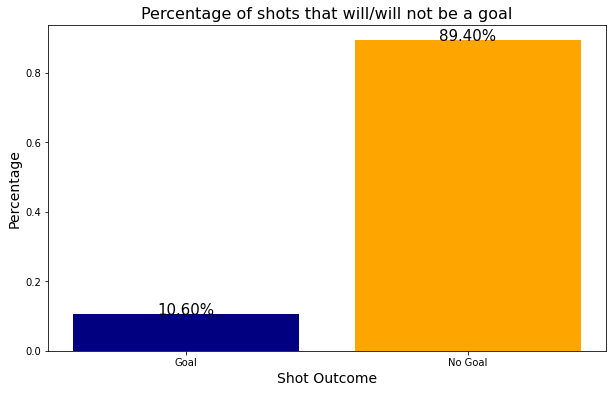

'10.6 % of the shot are goals while the rest (89.4%) of the shots are no goals.\nThis is clearly an example of a class imbalance and hence we need to introduce class weights\nor SMOTE to penalise the inaccurate prediction(or non prediction) of minority class to \ncompensate the class imbalance'

In [9]:
from collections import Counter
print(f"The number of classes before fit {Counter(yTrain)}")
plotClassdist(Counter(yTrain))
############################################################################################################################################

'''10.6 % of the shot are goals while the rest (89.4%) of the shots are no goals.
This is clearly an example of a class imbalance and hence we need to introduce class weights
or SMOTE to penalise the inaccurate prediction(or non prediction) of minority class to 
compensate the class imbalance'''


The number of classes after fit Counter({0: 209820, 1: 166928})


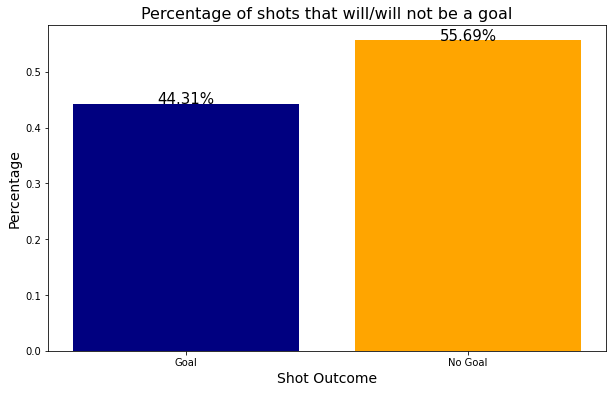

In [10]:
############################################################################################################################################
'''Class-Imbalance Hyperparameter Optimization 

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class,
although typically it is performance on the minority class that is most important.'''

########################################################################################################################################################################################################################################################################################
'''Synthetic Minority Oversampling Technique (SMOTE) 
One approach to addressing imbalanced datasets is to oversample the minority class.

The other approach is to synthesize minority class data points from the existing examples.
This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

SMOTE works by selecting examples that are close in the feature space, drawing a line between 
the examples in the feature space and drawing a new sample at a point along that line.'''
########################################################################################################################################################################################################################################################################################
from imblearn.combine import SMOTETomek
os=SMOTETomek(sampling_strategy=0.8)
X_train_ns,y_train_ns=os.fit_resample(xTrain,yTrain)
print(f"The number of classes after fit {Counter(y_train_ns)}")
plotClassdist(Counter(y_train_ns))

In [11]:
import pickle

# with open('RandomForest_pickle_ROCAUC_80epochs.pickle', 'wb') as f:
#     pickle.dump(trainedforest, f)

pickle_in = open('../input/d/nktthegreat/understat-expected-goals/RandomForest_pickle_ROCAUC.pickle','rb')
trainedforest_p = pickle.load(pickle_in)

Accuracy:  90.48 %
Brier RMSE:  0.1
Log Loss:  3.29
[[70925   658]
 [ 6952  1428]]
36.393348932266235 seconds


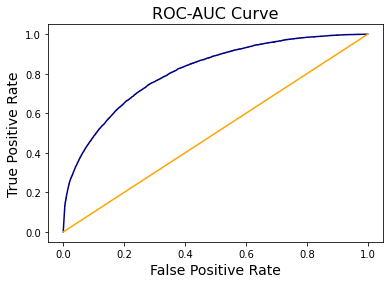

In [12]:
########################################################################################################################################################################################################################################################################################
'''Hyperparameter Optimization

Automated Hyperparameter Tuning
Automated Hyperparameter Tuning can be done by using techniques such as:

1.) Bayesian Optimization
2.) Gradient Descent
3.) Evolutionary Algorithms'''
########################################################################################################################################################################################################################################################################################
'''1.) Bayesian Optimization

Bayesian optimization uses probability to find the minimum of a function.
The final aim is to find the input value to a function which can gives us the lowest possible output value.
It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time.
In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin:

Objective Function = defines the loss function to minimize.
Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.'''
########################################################################################################################################################################################################################################################################################

# from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
# # t0 = time.time()

# space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
#         'max_depth': hp.quniform('max_depth', 10, 1200, 10),
#         'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
#         'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
#         'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
#         'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
#     }

# def objective(space):
#     model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
#                                  max_features = space['max_features'],
#                                  min_samples_leaf = space['min_samples_leaf'],
#                                  min_samples_split = space['min_samples_split'],
#                                  n_estimators = space['n_estimators'], 
#                                  )
#     # x = xTrain.sample(n=10000)
#     # y = yTrain[x.index]
#     accuracy = cross_val_score(model, X_train_ns,y_train_ns, cv = 3, n_jobs = -1, verbose = 1,scoring='f1').mean()

#     # We aim to maximize accuracy, therefore we return it as a negative value
#     return {'loss': -accuracy, 'status': STATUS_OK }

# # from sklearn.model_selection import RandomizedSearchCV
# # from sklearn.model_selection import GridSearchCV
# # lr_gridcv=GridSearchCV(estimator=lrModel,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1)
# ### fit the randomized model
# # best_lr=lr_gridcv.fit(X=np.array(xTrain), y=yTrain)

# # clf = GridSearchCV(lrModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# # best_lr= clf.fit(X=np.array(xTrain), y=yTrain)
# from sklearn.model_selection import cross_val_score
# trials = Trials()
# best = fmin(fn= objective,
#             space= space,
#             algo= tpe.suggest,
#             max_evals = 50,
#             trials= trials)


# crit = {0: 'entropy', 1: 'gini'}
# feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
# est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


# print(crit[best['criterion']])
# print(feat[best['max_features']])
# print(est[best['n_estimators']])

# trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
#                                        max_features = feat[best['max_features']], 
#                                        min_samples_leaf = best['min_samples_leaf'], 
#                                        min_samples_split = best['min_samples_split'], 
#                                        n_estimators = est[best['n_estimators']]).fit(xTrain,yTrain)
t0 = time.time()
predictionforest = trainedforest_p.predict(xTest)
predProbs = trainedforest_p.predict_proba(np.array(xTest))[:, 1]
RF_report, RF_cf_mat = ErrorCheck(yTest,predictionforest)
print(f'{time.time()-t0} seconds')
# xNew = df_new[["shotDist","shotAngle", 'StrongFoot']]
# yNew = df_new['outcome']

# predictionforest_new = trainedforest.predict(xNew)
# predProbs_new = trainedforest.predict_proba(np.array(xNew))[:, 1]
# RF_report_new, RF_cf_mat_new = ErrorCheck(yNew,predictionforest_new)

In [13]:
############################################################################################################################################
'''2.) Genetic Algorithms
Genetic Algorithms tries to apply natural selection mechanisms to Machine Learning contexts.

Let's imagine we create a population of N Machine Learning models with some predifined Hyperparameters.
We can then calculate the accuracy of each model and decide to keep just half of the models (the ones that performs best).
We can now generate some offsprings having similar Hyperparameters to the ones of the best models so that go get again a population of N models. 
At this point we can again caltulate the accuracy of each model and repeate the cycle for a defined number of generations. 
In this way, just the best models will survive at the end of the process.'''
############################################################################################################################################
'''import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = trainedforest_p.get_params()['n_estimators']-100, stop = trainedforest_p.get_params()['n_estimators']+100, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(trainedforest_p.get_params()['max_depth']-100,trainedforest_p.get_params()['max_depth']+100,5)]
# Minimum number of samples required to split a node
min_samples_split = np.random.uniform(0,trainedforest_p.get_params()['min_samples_split']+0.4,6).tolist()
# Minimum number of samples required at each leaf node
min_samples_leaf = np.random.uniform(0,trainedforest_p.get_params()['min_samples_leaf']+0.2,6).tolist()
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': ['auto'],
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['gini']}
config_dict={'sklearn.ensemble.RandomForestClassifier': param}
print(param)'''

from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 3, population_size= 20,verbosity= 3, 
                                 scoring = 'roc_auc', n_jobs = -1)
tpot_classifier.fit(np.array(xTrain), np.array(yTrain))


32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/80 [00:00<?, ?pipeline/s]

_pre_test decorator: _mate_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 52.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 96.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affinity. Ward can only work with euclidean distances..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.7983719680460777	XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.001, XGBClassifier__max_depth=10, XGBClassifier__min_child_weight=14, XGBClassifier__n_estimators=100, XGBClassifier__n_jobs=1, XGBClassifier__subsample=0.5, XGBClassifier__verbosity=0)
_pre_test decorator: _random_mutat

TPOTClassifier(generations=3, n_jobs=-1, population_size=20, scoring='roc_auc',
               verbosity=3)

In [14]:
np.array(xTrain)

array([[15.16047247, 24.53271744,  1.        ],
       [11.77964247, 30.39206529,  0.        ],
       [13.82931669, 22.33490047,  1.        ],
       ...,
       [11.59741255, 34.28837821,  2.        ],
       [ 4.38292276, 78.65559814,  0.        ],
       [29.23302811,  8.73209365,  2.        ]])

In [15]:
np.array(yTrain)

array([0, 0, 0, ..., 0, 1, 0])

In [16]:
accuracy = tpot_classifier.score(xTest, yTest)
print(accuracy)

0.7972247197263573


In [17]:
'''import xgboost as xgb
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.model_selection import cross_val_score
# t0 = time.time()

space = { 
    'learning_rate' : hp.choice("learning_rate", [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]),
    'reg_alpha' : hp.choice("reg_alpha", [0,0.1,1,10,100]),
    'gamma' : hp.uniform("gamma", 0.1, 1.0),
    'subsample' : hp.uniform("subsample", 0.5, 1.0),
    'colsample_bytree' : hp.uniform("colsample_bytree", 0.5, 1.0),
    'max_depth' : hp.choice("max_depth", [3,4,5,6,7,8,9,10])    
    }

def objective(space):
    model = xgb.XGBClassifier(
                              learning_rate = space['learning_rate'],
                              gamma = space['gamma'],
                              reg_alpha = space['reg_alpha'],
                              subsample = space['subsample'],
                              colsample_bytree = space['colsample_bytree'], 
                              max_depth = space['max_depth'],
                              use_label_encode = False,
                              )
    
    # x = xTrain.sample(n=10000)
    # y = yTrain[x.index]
    accuracy = cross_val_score(model, X_train_ns,y_train_ns, cv = 5, n_jobs = -1, verbose = 3, scoring='f1').mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': 1-accuracy, 'status': STATUS_OK }

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV
# lr_gridcv=GridSearchCV(estimator=lrModel,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1)
### fit the randomized model
# best_lr=lr_gridcv.fit(X=np.array(xTrain), y=yTrain)

# clf = GridSearchCV(lrModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# best_lr= clf.fit(X=np.array(xTrain), y=yTrain)

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)

trainedxgb = xgb.XGBClassifier(learning_rate = best['learning_rate'],
                              gamma = best['gamma'],
                              subsample = best['subsample'],
                              reg_alpha = best['reg_alpha'],
                              colsample_bytree = best['colsample_bytree'], 
                              max_depth = best['max_depth'],
                              gpu_id=0,
                              predictor="gpu_predictor",
                              tree_method="gpu_hist",
                              n_estimators=5000).fit(X_train_ns,y_train_ns)'''



'import xgboost as xgb\nfrom hyperopt import hp,fmin,tpe,STATUS_OK,Trials\nfrom sklearn.model_selection import cross_val_score\n# t0 = time.time()\n\nspace = { \n    \'learning_rate\' : hp.choice("learning_rate", [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]),\n    \'reg_alpha\' : hp.choice("reg_alpha", [0,0.1,1,10,100]),\n    \'gamma\' : hp.uniform("gamma", 0.1, 1.0),\n    \'subsample\' : hp.uniform("subsample", 0.5, 1.0),\n    \'colsample_bytree\' : hp.uniform("colsample_bytree", 0.5, 1.0),\n    \'max_depth\' : hp.choice("max_depth", [3,4,5,6,7,8,9,10])    \n    }\n\ndef objective(space):\n    model = xgb.XGBClassifier(\n                              learning_rate = space[\'learning_rate\'],\n                              gamma = space[\'gamma\'],\n                              reg_alpha = space[\'reg_alpha\'],\n                              subsample = space[\'subsample\'],\n                              colsample_bytree = space[\'colsample_bytree\'], \n                              max_dept

In [18]:
'''predictionxgb = trainedxgb.predict(xTest)
predProbs = trainedxgb.predict_proba(np.array(xTest))[:, 1]
xGb_report, xGb_cf_mat = ErrorCheck(yTest,predictionxgb)'''

'predictionxgb = trainedxgb.predict(xTest)\npredProbs = trainedxgb.predict_proba(np.array(xTest))[:, 1]\nxGb_report, xGb_cf_mat = ErrorCheck(yTest,predictionxgb)'